# Density profile $\rho_x(x)$

## The goal of this notebook is to analyze a number of configs from a trajectory file and report the density along the $x$-axis. 

For a system that is separated, we should see something like two Heaviside step functions, whereas a mixed system should have two flat, equal, and overlapping densities in that direction.

Pseudocode for this would be something like the following:

```bash
Loop configs:
    loop over particles:
        count[pos[i][x] / dx]++;
```
and then divide by `configs*dx*Ly*Lz`.

My approach:
- [ ] Read in lammps trajectories as pandas DataFrames
- [ ] Make a histogram of $x$-positions for the last $n$ trajectories in a file
- [ ] Rescale the counts appropriately and report with and without type separation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
num_configs = 1 #only do the last <this many> configurations

In [12]:
import glob

pattern = 'Surface_Tension/equil_traj.dump'
matching_files = glob.glob(pattern)
filename = matching_files[0]

if len(matching_files) >1:
    print("Warning: multiple trajectory files found. ")
    print(f"Using {filename}")


num_atoms = 7600
# first, get the boxsize in case we need it:
box = pd.read_csv(filename, nrows = 3, skiprows = 5, header =None, delim_whitespace = True)
# also, get the number of configs:
with open(filename, 'r') as file:
    line_count = file.read().count('\n') + 1
configs = line_count // (num_atoms + 9)


We'll start with one mixed system, where we expect the densities to be uniform. 

In [13]:
filename

'Surface_Tension/equil_traj.dump'

In [14]:
mix_arr = []
names = ["id", "mol", "type", "x", "y", "z"]

#
for i in range(configs-num_configs, configs):
    mix = pd.read_csv(filename, delim_whitespace=True, skiprows= (num_atoms+9)*i+9, header = None, names= names, nrows = num_atoms, index_col=None)
    mix_arr.append(mix)

In [15]:
# # reading all configs via list comprehension to save some time
# df_arr = [pd.read_csv(filename, delim_whitespace=True, skiprows=(num_atoms+9)*i+9, header=None, names=names, nrows=num_atoms, index_col=None) for i in range(configs)]
# result_df = pd.concat(df_arr, ignore_index=True)

Text(0, 0.5, 'Count')

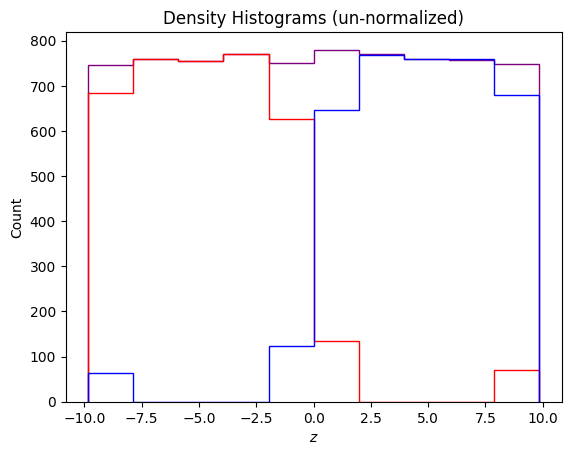

In [16]:
mix_df = pd.concat(mix_arr, ignore_index=True)
nbins = 10
Lx = 20
dx = Lx/nbins
counts, bins, patches = plt.hist(mix_df['x'], bins=nbins, color='purple', histtype='step')
counts_1, bins_1, patches_1 = plt.hist(mix_df[mix_df.type == 1]['x'], bins=nbins, color='r', histtype='step')
counts_2, bins_2, patches_2 = plt.hist(mix_df[mix_df.type == 2]['x'], bins=nbins, color='b', histtype='step')
counts/= (num_configs* Lx**2 * dx)
counts_1/= (num_configs* Lx**2 * dx)
counts_2/= (num_configs* Lx**2 * dx)
plt.title("Density Histograms (un-normalized)")
plt.xlabel(r"$z$")
plt.ylabel("Count")

In [9]:
mix_df

,id,mol,type,x,y,z
0,2497,3,1,-9.30939,-9.15510,-8.62203
1,7382,3,2,-9.80739,-8.91489,-9.53152
2,4028,5,2,-8.99251,-9.40563,-9.65249
3,2498,3,1,-8.34043,-9.16429,-8.77357
4,5480,3,2,-7.22798,-8.70373,-9.29720
...,...,...,...,...,...,...
7595,2339,3,1,7.85830,8.79655,8.66562
7596,2340,3,1,7.49486,8.46713,9.53119
7597,2654,3,1,8.86920,9.56144,9.27216
7598,4956,3,2,8.87480,8.90829,8.45456


Text(0.5, 1.0, '$\\rho_z(z)$')

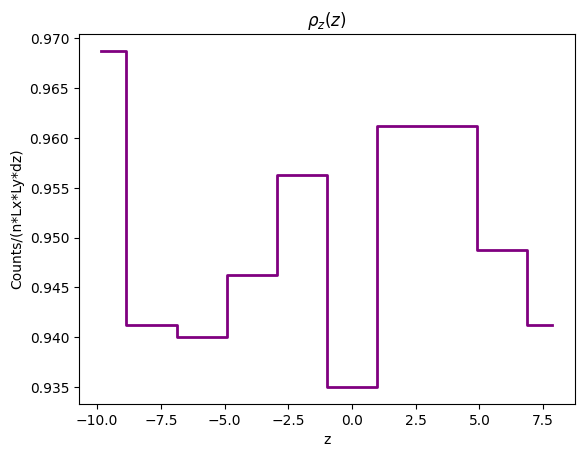

In [10]:
plt.step(bins[:-1], counts, where='mid', color='purple', linestyle='-', linewidth=2)
plt.xlabel("z")
plt.ylabel("Counts/(n*Lx*Ly*dz)")
plt.title(r"$\rho_z(z)$")

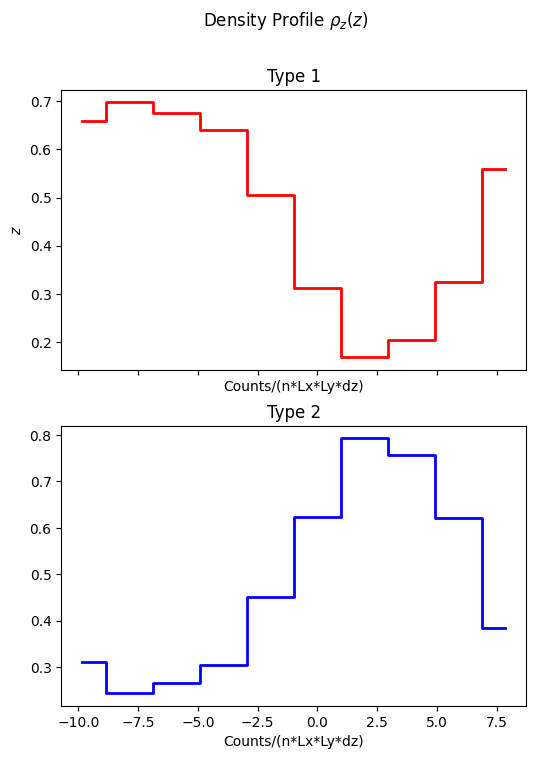

In [11]:
fig, axs = plt.subplots(2, 1,  figsize=(6,8), sharex = True)  # 1 row, 2 columns
plt.suptitle(r"Density Profile $\rho_z(z)$")
# Plot for the first subplot
axs[0].step(bins[:-1], counts_1, where='mid', color='r', linestyle='-', linewidth=2)
axs[0].set_title('Type 1')
axs[0].set_xlabel('Counts/(n*Lx*Ly*dz)')
axs[0].set_ylabel(r"$z$")

# Plot for the second subplot
axs[1].step(bins[:-1], counts_2, where='mid', color='b', linestyle='-', linewidth=2)
axs[1].set_title('Type 2')
axs[1].set_xlabel('Counts/(n*Lx*Ly*dz)')

plt.show()

Now compare to one that should have a more clean interface:

In [11]:
filename = 'sep_traj.dump'
sep_arr = []
names = ["id", "mol", "type", "x", "y", "z"]
for i in range(configs-num_configs, configs):
    sep = pd.read_csv(filename, delim_whitespace=True, skiprows= (num_atoms+9)*i+9, header = None, names= names, nrows = num_atoms, index_col=None)
    sep_arr.append(sep)

In [12]:
filename

'sep_traj.dump'

Text(0, 0.5, 'Count')

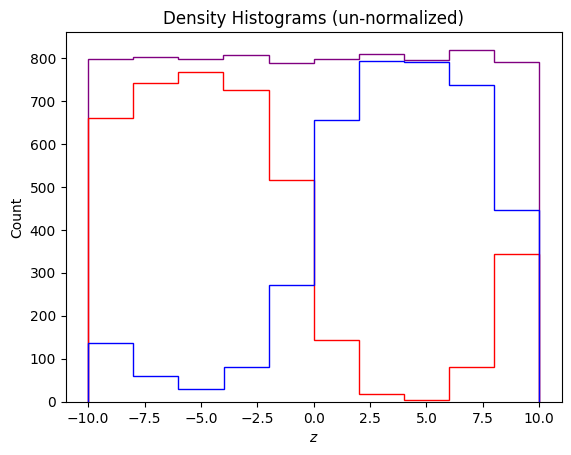

In [16]:
sep_df = pd.concat(sep_arr, ignore_index=True)

counts, bins, patches = plt.hist(sep_df['x'], bins=nbins, color='purple', histtype='step')
counts_1, bins_1, patches_1 = plt.hist(sep_df[sep_df.type == 1]['x'], bins=nbins, color='r', histtype='step')
counts_2, bins_2, patches_2 = plt.hist(sep_df[sep_df.type == 2]['x'], bins=nbins, color='b', histtype='step')
counts/= (num_configs* Lx**2 * dx)
counts_1/= (num_configs*Lx**2 * dx)
counts_2/= (num_configs *Lx**2 * dx)
plt.title("Density Histograms (un-normalized)")
plt.xlabel(r"$x$")
plt.ylabel("Count")

Text(0.5, 1.0, '$\\rho_z(z)$')

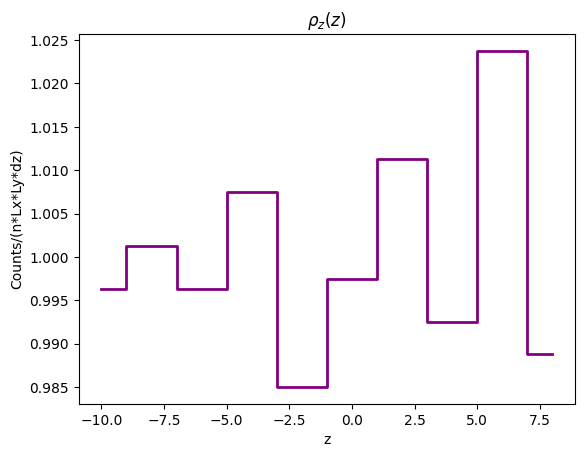

In [17]:
plt.step(bins[:-1], counts, where='mid', color='purple', linestyle='-', linewidth=2)
plt.xlabel("z")
plt.ylabel("Counts/(n*Lx*Ly*dz)")
plt.title(r"$\rho_z(z)$")

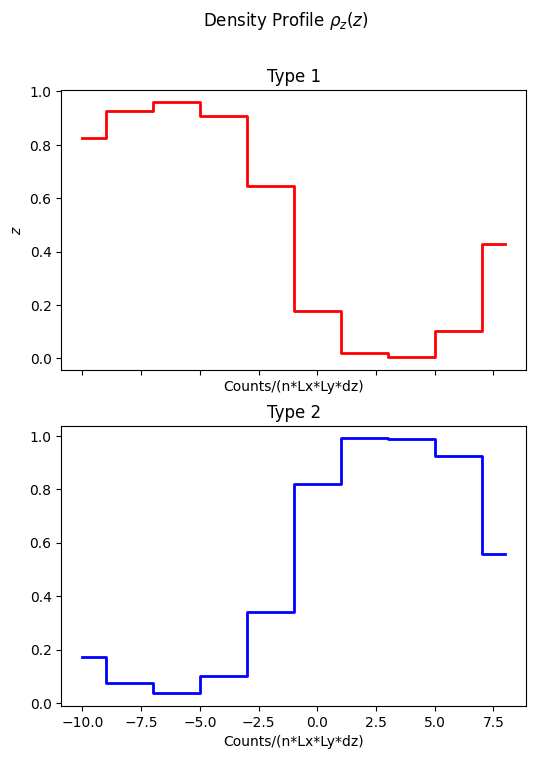

In [18]:
fig, axs = plt.subplots(2, 1,  figsize=(6,8), sharex = True)  # 1 row, 2 columns
plt.suptitle(r"Density Profile $\rho_z(z)$")
# Plot for the first subplot
axs[0].step(bins[:-1], counts_1, where='mid', color='r', linestyle='-', linewidth=2)
axs[0].set_title('Type 1')
axs[0].set_xlabel('Counts/(n*Lx*Ly*dz)')
axs[0].set_ylabel(r"$z$")

# Plot for the second subplot
axs[1].step(bins[:-1], counts_2, where='mid', color='b', linestyle='-', linewidth=2)
axs[1].set_title('Type 2')
axs[1].set_xlabel('Counts/(n*Lx*Ly*dz)')

plt.show()